# Speech Command Recognition

## Import Libraries

In [1]:
import os
import sys
import glob
import shutil
import librosa
import warnings
import numpy as np
import pandas as pd
import os.path as osp
import tensorflow as tf

from tqdm import tqdm

warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

PATH = osp.dirname(os.getcwd())

print('Done!')

2023-03-08 07:51:53.630656: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-08 07:51:53.731523: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-08 07:51:53.734234: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-08 07:51:53.734248: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Done!


In [2]:
%cd ..
print('Done!')   

/home/shintaz/Projects/speech_command_recognition
Done!


## Load Configuration File

In [3]:
import yaml

config_file = osp.join(PATH, 'params.yaml')
with open(config_file) as conf_file:
    config = yaml.safe_load(conf_file)

print('Done!')    

Done!


## Load Dataset

In [4]:
from src.stages.data_load import data_load
data_load(config_path = 'params.yaml')

print('Done!')    

2023-03-08 07:51:54,726 — DATA_LOAD — INFO — Get dataset
2023-03-08 07:51:54,747 — DATA_LOAD — INFO — Save raw data
Done!


## Preprocessing Data

In [5]:
from src.stages.preprocessing_data import preprocessing_data
preprocessing_data(config_path = 'params.yaml')

print('Done!')    

2023-03-08 07:51:54,770 — DATA PREPROCESSING — INFO — Get filenames
2023-03-08 07:51:54,779 — DATA PREPROCESSING — INFO — Equalize Duration
2023-03-08 07:52:05,785 — DATA PREPROCESSING — INFO — Save processed data
Done!


## Feature Extraction

In [6]:
from src.stages.featurize import featurize
featurize(config_path = 'params.yaml')

print('Done!')    

2023-03-08 07:52:06,350 — FEATURE EXTRACTION — INFO — Get data
2023-03-08 07:52:06,668 — FEATURE EXTRACTION — INFO — Extract Features
2023-03-08 07:52:23,221 — FEATURE EXTRACTION — INFO — Save featues and label data
Done!


## Train Val Test Split

In [7]:
from src.stages.data_split import data_split
data_split(config_path = 'params.yaml')

print('Done!')    

2023-03-08 07:52:23,313 — DATA SPLIT: TRAIN, VAL, & TEST — INFO — Get feature and label data
2023-03-08 07:52:23,336 — DATA SPLIT: TRAIN, VAL, & TEST — INFO — Split data
2023-03-08 07:52:23,361 — DATA SPLIT: TRAIN, VAL, & TEST — INFO — Save train data
2023-03-08 07:52:23,401 — DATA SPLIT: TRAIN, VAL, & TEST — INFO — Save validation data
2023-03-08 07:52:23,416 — DATA SPLIT: TRAIN, VAL, & TEST — INFO — Save test data
Done!


## Training and model generation

In [8]:
from src.stages.train import train
train(config_path = 'params.yaml')

print('Done!')    

2023-03-08 07:52:23,430 — TRAINING AND MODEL GENERATION — INFO — Get train data
2023-03-08 07:52:23,444 — TRAINING AND MODEL GENERATION — INFO — Get validation data
2023-03-08 07:52:23,452 — TRAINING AND MODEL GENERATION — INFO — Compute class weights
2023-03-08 07:52:23,455 — TRAINING AND MODEL GENERATION — INFO — One hot encoding
2023-03-08 07:52:23,456 — TRAINING AND MODEL GENERATION — INFO — Get model
2023-03-08 07:52:23,661 — TRAINING AND MODEL GENERATION — INFO — Compile model
2023-03-08 07:52:23,670 — TRAINING AND MODEL GENERATION — INFO — Training


2023-03-08 07:52:23.466886: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-08 07:52:23.466919: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-08 07:52:23.466937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (IGN-BLR-LP-0402): /proc/driver/nvidia/version does not exist
2023-03-08 07:52:23.467149: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.74074, saving model to models/model.h5
175/175 - 3s - loss: 1.6095 - accuracy: 0.4798 - val_loss: 0.9397 - val_accuracy: 0.7407 - 3s/epoch - 16ms/step
Epoch 2/50

Epoch 2: val_accuracy improved from 0.74074 to 0.84861, saving model to models/model.h5
175/175 - 1s - loss: 0.7731 - accuracy: 0.7979 - val_loss: 0.5819 - val_accuracy: 0.8486 - 1s/epoch - 7ms/step
Epoch 3/50

Epoch 3: val_accuracy improved from 0.84861 to 0.87176, saving model to models/model.h5
175/175 - 1s - loss: 0.5779 - accuracy: 0.8534 - val_loss: 0.5112 - val_accuracy: 0.8718 - 1s/epoch - 7ms/step
Epoch 4/50

Epoch 4: val_accuracy improved from 0.87176 to 0.89583, saving model to models/model.h5
175/175 - 1s - loss: 0.4971 - accuracy: 0.8757 - val_loss: 0.4470 - val_accuracy: 0.8958 - 1s/epoch - 7ms/step
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0.89583
175/175 - 1s - loss: 0.4395 - accuracy: 0.8921 - val_loss: 0.4565 - val_accuracy: 0.8926 - 1s/e

175/175 - 1s - loss: 0.1730 - accuracy: 0.9771 - val_loss: 0.3105 - val_accuracy: 0.9449 - 1s/epoch - 7ms/step
Epoch 46/50

Epoch 46: val_accuracy did not improve from 0.94491
175/175 - 1s - loss: 0.1906 - accuracy: 0.9727 - val_loss: 0.3279 - val_accuracy: 0.9403 - 1s/epoch - 7ms/step
Epoch 47/50

Epoch 47: val_accuracy did not improve from 0.94491
175/175 - 1s - loss: 0.1871 - accuracy: 0.9709 - val_loss: 0.3498 - val_accuracy: 0.9329 - 1s/epoch - 7ms/step
Epoch 48/50

Epoch 48: val_accuracy did not improve from 0.94491
175/175 - 1s - loss: 0.1736 - accuracy: 0.9762 - val_loss: 0.3457 - val_accuracy: 0.9361 - 1s/epoch - 7ms/step
Epoch 49/50

Epoch 49: val_accuracy did not improve from 0.94491
175/175 - 1s - loss: 0.1843 - accuracy: 0.9737 - val_loss: 0.3526 - val_accuracy: 0.9380 - 1s/epoch - 7ms/step
Epoch 50/50

Epoch 50: val_accuracy did not improve from 0.94491
175/175 - 1s - loss: 0.1814 - accuracy: 0.9768 - val_loss: 0.3637 - val_accuracy: 0.9324 - 1s/epoch - 7ms/step
2023-03-0

## Evaluate

In [9]:
from src.stages.evaluate import evaluate
evaluate(config_path = 'params.yaml')

print('Done!')  

2023-03-08 07:53:27,149 — EVALUATE MODEL — INFO — Get test data
2023-03-08 07:53:27,151 — EVALUATE MODEL — INFO — Evaluate data and generate metrics
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 14ms/step
2023-03-08 07:53:37,562 — EVALUATE MODEL — INFO — Save metrics
2023-03-08 07:53:37,563 — EVALUATE MODEL — INFO — Save test_report to csv
Done!


## Visualize

2023-03-08 07:53:37,857 — VISUALIZE REPORTS — INFO — Get history data
2023-03-08 07:53:37,859 — VISUALIZE REPORTS — INFO — Plot history data
Debug
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
[0.9396812915802002, 0.5819294452667236, 0.5111536383628845, 0.4470077157020569, 0.45652860403060913, 0.4015440046787262, 0.38988468050956726, 0.38357242941856384, 0.34393110871315, 0.35580751299858093, 0.366447389125824, 0.3545403778553009, 0.3444613218307495, 0.34567996859550476, 0.3420676589012146, 0.33643877506256104, 0.35898491740226746, 0.33358997106552124, 0.33376964926719666, 0.3330986499786377, 0.32984307408332825, 0.3379434049129486, 0.35111144185066223, 0.31271639466285706, 0.3377404510974884, 0.3260556757450104, 0.32366645336151123, 0.32911521196365356, 0.3036949038505554, 0.3213486075401306, 0.32850074768066406, 0.3142343759536743, 0.3441302

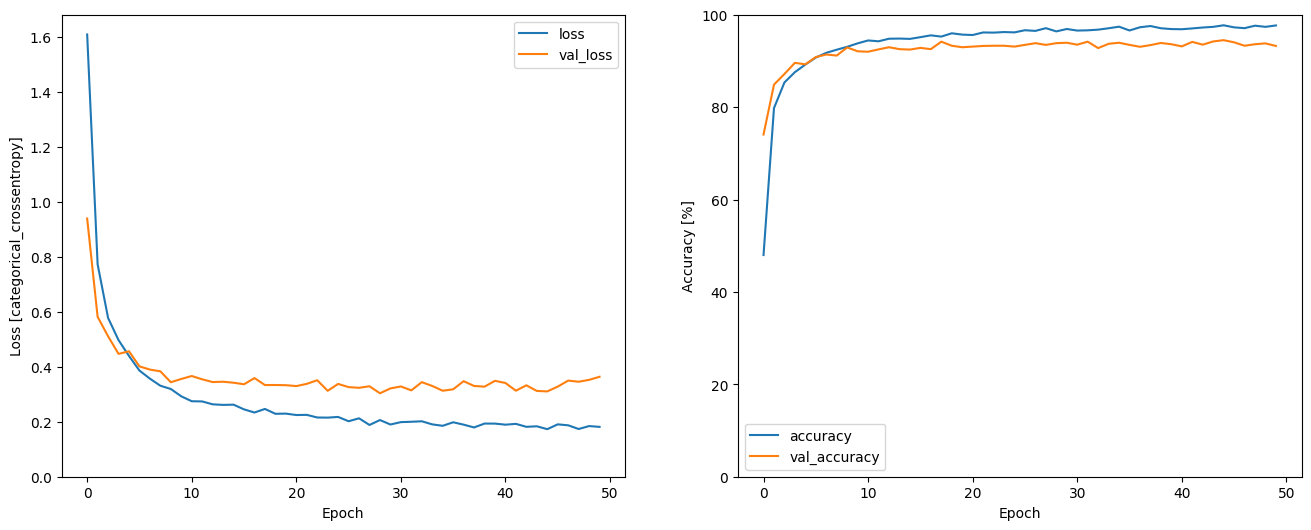

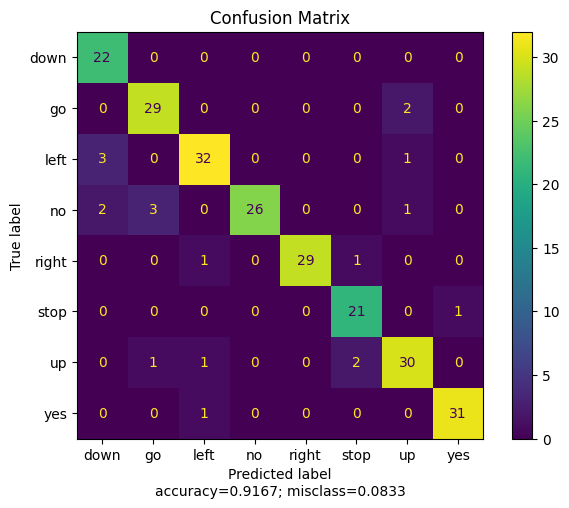

2023-03-08 07:53:38,461 — VISUALIZE REPORTS — INFO — Save confusion matrix image
Done!


<Figure size 640x480 with 0 Axes>

In [10]:
from src.stages.visualize import visualize
visualize(config_path = 'params.yaml')

print('Done!') 